In [215]:
import pandas as pd   #for data loading
import numpy as np    #for numerical operations

from sklearn.feature_extraction.text import CountVectorizer    #turns text into a bag-of-words model (numeric vectors)
from sklearn.model_selection import train_test_split           #to split your dataset into training and testing sets (to evaluate models performance)
from sklearn.naive_bayes import MultinomialNB                  #for text classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
                          #accuracy_score: Overall accuracy.
                          #classification_report: Precision, recall, F1-score.
                          #confusion_matrix: Table showing true vs. predicted labels.

import seaborn as sns #for visualisation

# **preprocessing**

---



In [216]:
#Load Dataset

data = pd.read_csv("combined_data.csv")

In [217]:
data['label'] = data['label'].map({1: 'spam', 0: 'ham'})

In [218]:
#converts all column names to lowercase for consistency
data.columns = [col.strip().lower() for col in data.columns]


In [219]:
#preview of the data

data.head()

,label,text
0,spam,ounce feather bowl hummingbird opec moment ala...
1,spam,wulvob get your medircations online qnb ikud v...
2,ham,computer connection from cnn com wednesday es...
3,spam,university degree obtain a prosperous future m...
4,ham,thanks for all your answers guys i know i shou...


In [220]:
#shape (number_of_rows, number_of_columns)

data.shape

(83448, 2)

In [221]:
#summary of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  object
 1   text    83448 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [222]:
#used to check for missing (null) values in each column

data.isnull().sum()

label    0
text     0
dtype: int64

In [223]:
#returns all the unique values in the label

data.label.unique()

array(['spam', 'ham'], dtype=object)

In [224]:
#counts how many times each unique value appears in the label column

data['label'].value_counts()

label
spam    43910
ham     39538
Name: count, dtype: int64

In [225]:
#find the rows where the text column has duplicate values

data[data['text'].duplicated(keep=False)]

#the word "hi" appears in both class 0 and class 1
#the word "unsubscribe" appears in both class 0 and 1

,label,text
12425,ham,hi
20516,ham,unsubscribe
37213,spam,unsubscribe
50633,spam,hi


In [226]:
#Remove duplicates

data.drop_duplicates(subset=['text'], inplace=True)
data.shape

(83446, 2)

# **Feature Engineering**

In [227]:
#Feature Engineering is the process of transforming raw data into features (input variables) that better represent the underlying problem to the predictive models.
#It helps improve model accuracy by selecting, modifying, or creating new features.

In [228]:
#split the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [229]:
#Training and testing data shape

X_train.shape, X_test.shape

((66756,), (16690,))

In [230]:
#converts text data into numerical features

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [231]:
X_train.shape

(66756, 275154)

# **Visualisation**

---



In [232]:
import seaborn as sns
import matplotlib.pyplot as plt


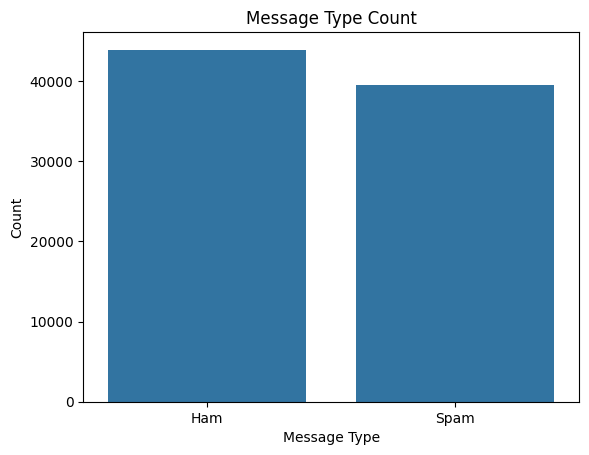

In [233]:
sns.countplot(x='label', data=data)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Message Type Count")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [234]:
#chart shows number of ham and spam 

# **Classification**

---



# **Model training**

In [235]:
#model training is the process of teaching a mechine learning algorithm to recognize patterns using training data

In [236]:
#Trains the model on your training data

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [237]:
 # Save the trained model
joblib.dump(model, "spam_classifier.pkl")
print("✅ Trained and saved spam_classifier.pkl")


✅ Trained and saved spam_classifier.pkl



# **Model Evaluation**

In [238]:
#model evaluation is checking how well the trained model performs on unseen data (test data)

In [239]:
#Transforming the test data into numerical feature

X_test = vectorizer.transform(X_test)

In [240]:
#size of the transformed test data
X_test.shape

(16690, 275154)

In [241]:
#this uses the trained naive bayes model to predict the class (ham or spam) for each message in x_test
y_pred = classifier.predict(X_test)

In [242]:
#calculate the accuracy
classifier.score(X_test, y_test)

0.9756740563211503

In [243]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.97      7880
        spam       0.99      0.97      0.98      8810

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



# **Confusion matrix**

In [244]:
#it is a table used to evaluate the performance of a classification model, it compares the actual label with predicted labels

In [245]:
# Confusion matrix

print("Distribution of predicted labels:")
print("Ham (0): ", np.sum(y_pred == 0))
print("Spam (1): ", np.sum(y_pred == 1))

#this show how many messages were predicted as spam and how many ham

Distribution of predicted labels:
Ham (0):  0
Spam (1):  0


In [246]:
print("Distribution of actual labels:")
print("Ham (0): ", np.sum(y_test == 0))
print("Spam (1): ", np.sum(y_test == 1))

# this show how many of each class exist in actual set

Distribution of actual labels:
Ham (0):  0
Spam (1):  0


In [247]:
#this compares the true label with predicted label
confusion_matrix(y_test, y_pred)

array([[7755,  125],
       [ 281, 8529]])

<Axes: >

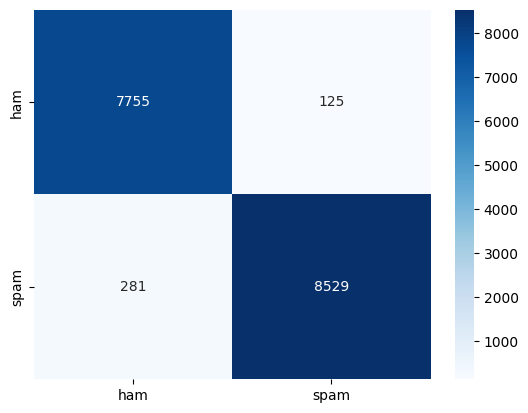

In [248]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])

In [249]:
#visualized in the heatmap shows how well the model performed. 
# It correctly classified 7755 ham and 8529 spam messages.
# Only 406 messages were misclassified. 
# This results in a high accuracy of ~97.56%, 
# indicating the model performs effectively in detecting spam.